# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# 3 Observable Trends:

* The closer to the equator the city is, the warmer the maximum temperature is.
* There appears to be little correlation between humidity and the city proximity to the equator.
* There also appears to be little correlation between how cloudy it is and the proximity of the city to the equator.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
requests.get(query_url + cities[4]).json()

{'coord': {'lon': 15.16, 'lat': -26.65},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 66.99,
  'feels_like': 63,
  'temp_min': 66.99,
  'temp_max': 66.99,
  'pressure': 1015,
  'humidity': 56,
  'sea_level': 1015,
  'grnd_level': 1011},
 'wind': {'speed': 7.63, 'deg': 177},
 'clouds': {'all': 0},
 'dt': 1587195093,
 'sys': {'country': 'NA', 'sunrise': 1587187017, 'sunset': 1587227993},
 'timezone': 7200,
 'id': 3355672,
 'name': 'Lüderitz',
 'cod': 200}

In [35]:
# Open Weather URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Lists
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
city_new = []
citycount = len(cities)

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop to store data and exclude cities that can't be found
for x in range(0, citycount):
    try:
        response = requests.get(query_url + cities[x]).json()
        city_new.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {x} | {cities[x]}')
    except KeyError:
        print('City Not Found. Skipping...')
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | zhuhai
Processing Record 1 | pevek
Processing Record 2 | codrington
Processing Record 3 | acapulco
Processing Record 4 | luderitz
Processing Record 5 | lebu
City Not Found. Skipping...
Processing Record 7 | bluff
Processing Record 8 | new norfolk
City Not Found. Skipping...
Processing Record 10 | avarua
Processing Record 11 | alugan
Processing Record 12 | nikolskoye
Processing Record 13 | conceicao do araguaia
Processing Record 14 | barrow
Processing Record 15 | meiganga
Processing Record 16 | aqtobe
City Not Found. Skipping...
Processing Record 18 | atuona
Processing Record 19 | puerto ayora
Processing Record 20 | rikitea
Processing Record 21 | kasongo-lunda
Processing Record 22 | ponta do sol
Processing Record 23 | kavieng
Processing Record 24 | saskylakh
Processing Record 25 | bilma
Processing Record 26 | beringovskiy
Processing Record 27 | hobart
Processing Record 28 | donskoye
Processing Record 29 | punta

Processing Record 251 | iqaluit
Processing Record 252 | palaikastron
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record 255 | vavoua
Processing Record 256 | berlevag
Processing Record 257 | porto novo
Processing Record 258 | nemuro
Processing Record 259 | souillac
City Not Found. Skipping...
Processing Record 261 | yar-sale
Processing Record 262 | waingapu
Processing Record 263 | ulaangom
Processing Record 264 | paamiut
Processing Record 265 | mahibadhoo
Processing Record 266 | san felipe
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record 269 | namibe
Processing Record 270 | esna
Processing Record 271 | coihaique
City Not Found. Skipping...
Processing Record 273 | french harbor
Processing Record 274 | shimoda
Processing Record 275 | pedro ii
Processing Record 276 | mayo
City Not Found. Skipping...
Processing Record 278 | cap malheureux
Processing Record 279 | clyde river
Processing Record 280 | flinders
Processing Record 281 | sabang
Proces

Processing Record 502 | tiarei
Processing Record 503 | luwuk
Processing Record 504 | grand gaube
Processing Record 505 | colac
Processing Record 506 | sola
Processing Record 507 | mindelo
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record 510 | puerto del rosario
Processing Record 511 | saint augustine
City Not Found. Skipping...
Processing Record 513 | makungu
Processing Record 514 | dhadar
Processing Record 515 | westport
Processing Record 516 | kholodnyy
Processing Record 517 | mega
Processing Record 518 | stefan voda
Processing Record 519 | raudeberg
Processing Record 520 | pisco
Processing Record 521 | moba
Processing Record 522 | taltal
Processing Record 523 | bukama
Processing Record 524 | portland
Processing Record 525 | tuxpan
Processing Record 526 | rockland
Processing Record 527 | ginir
Processing Record 528 | itarema
Processing Record 529 | esmeraldas
Processing Record 530 | banyuwangi
Processing Record 531 | mount hagen
Processing Record 532 | mancio

In [36]:
a1 = len(lat)
a2 = len(lon)
a3 = len(temp)
a4 = len(hum)
a5 = len(cloud)
a6 = len(wind)
a7 = len(country)
a8 = len(date)
a9 = len(city_new)

print(f'lat = {a1}')
print(f'lon = {a2}')
print(f'temp = {a3}')
print(f'hum = {a4}')
print(f'cloud = {a5}')
print(f'wind = {a6}')
print(f'country = {a7}')
print(f'date = {a8}')
print(f'city = {a9}')

lat = 542
lon = 542
temp = 542
hum = 542
cloud = 542
wind = 542
country = 542
date = 542
city = 542


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
a1 = len(lat)
a2 = len(lon)
a3 = len(temp)
a4 = len(hum)
a5 = len(cloud)
a6 = len(wind)
a7 = len(country)
a8 = len(date)
a9 = len(city_new)

print(f'city = {a9}')
print(f'lat = {a1}')
print(f'lon = {a2}')
print(f'temp = {a3}')
print(f'hum = {a4}')
print(f'cloud = {a5}')
print(f'wind = {a6}')
print(f'country = {a7}')
print(f'date = {a8}')

city = 542
lat = 542
lon = 542
temp = 542
hum = 542
cloud = 542
wind = 542
country = 542
date = 542


In [44]:
# Create a data frame
weather_df = pd.DataFrame({
    "City": city_new,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date})

weather_df.to_csv(output_data_file)

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhuhai,22.28,113.57,80.60,94,20,8.05,CN,1587195371
1,Pevek,69.70,170.31,-0.29,91,2,7.74,RU,1587195372
2,Codrington,-38.27,141.97,55.92,73,100,4.70,AU,1587195372
3,Acapulco de Juárez,16.86,-99.89,77.00,78,5,3.44,MX,1587195348
4,Lüderitz,-26.65,15.16,66.99,56,0,7.63,NA,1587195372
...,...,...,...,...,...,...,...,...,...
537,Verkhnyaya Toyma,62.23,45.00,38.53,82,98,3.09,RU,1587195292
538,Alexandria,31.22,29.96,69.80,56,0,6.93,EG,1587195358
539,Soyo,-6.13,12.37,78.80,94,75,5.35,AO,1587195500
540,Tuburan,6.64,122.27,91.40,55,20,6.93,PH,1587195501


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

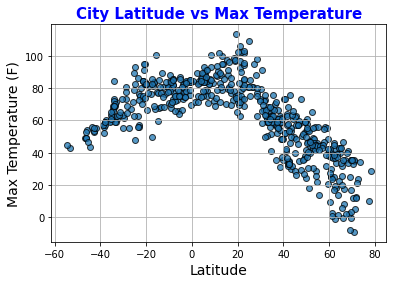

The code is analyzing the temperature (high) of each city relative to the equator.


In [88]:
# Scatter plot for Temperature (F) vs. Latitude

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.title('City Latitude vs Max Temperature', fontsize=15, fontweight= 'bold', color='b')
plt.grid()

plt.savefig("output_data/Figure1.png")

plt.show()

print('The code is analyzing the temperature (high) of each city relative to the equator.')

## Latitude vs. Humidity Plot

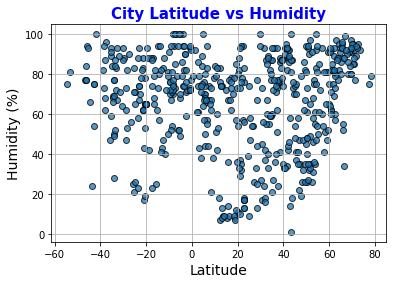

The code is analyzing the humidity of each city relative to the equator.


In [87]:
# Scatter plot for Humidity (%) vs. Latitude

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs Humidity', fontsize=15, fontweight= 'bold', color='b')
plt.grid()

plt.savefig("output_data/Figure2.png")

plt.show()
print('The code is analyzing the humidity of each city relative to the equator.')

## Latitude vs. Cloudiness Plot

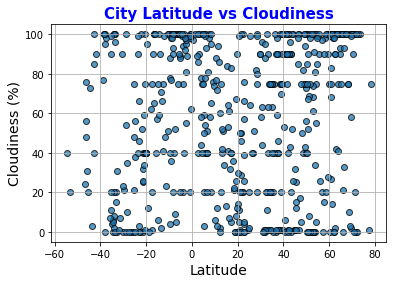

The code is analyzing the cloudiness of each city relative to the equator.


In [85]:
# Scatter plot for Cloudiness (%) vs. Latitude

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title('City Latitude vs Cloudiness', fontsize=15, fontweight= 'bold', color='b')
plt.grid()

plt.savefig("output_data/Figure3.png")

plt.show()
print('The code is analyzing the cloudiness of each city relative to the equator.')

## Latitude vs. Wind Speed Plot

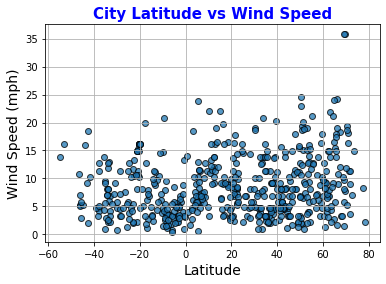

The code is analyzing the wind speed of each city relative to the equator.


In [86]:
# Scatter plot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.title('City Latitude vs Wind Speed', fontsize=15, fontweight= 'bold', color='b')
plt.grid()

plt.savefig("output_data/Figure4.png")

plt.show()
print('The code is analyzing the wind speed of each city relative to the equator.')

## Linear Regression

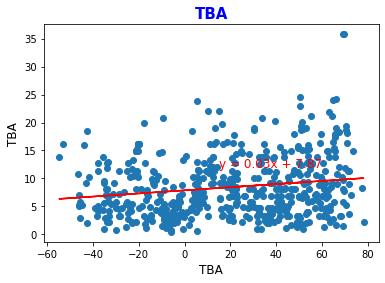

In [114]:
# OPTIONAL: Create a function to create Linear Regression plots

x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (15, 12), fontsize=12, color="red")
plt.xlabel('TBA', fontsize=12)
plt.ylabel('TBA', fontsize=12)
plt.title('TBA', fontsize=15, fontweight= 'bold', color='b')

plt.show()

In [80]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = weather_df.loc[weather_df['Lat']>= 0]
south_hem = weather_df.loc[weather_df['Lat']< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7366870970092367


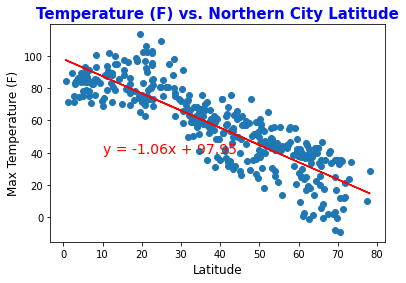

There is a very high correlation that as the further north the city is from the equator, the colder it gets.


In [107]:
# Northern Hemisphere - Temperature (F) vs. Latitude

x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)
plt.title('Temperature (F) vs. Northern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is a very high correlation that as the further north the city is from the equator, the colder it gets.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4404548933491526


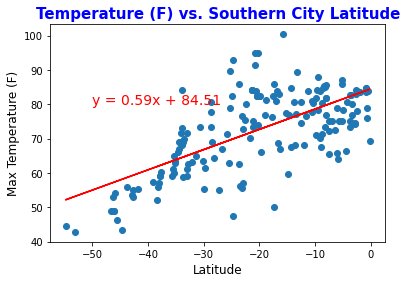

There is a moderate correlation that as the further south the city is from the equator, the colder it gets.


In [115]:
# Southern Hemisphere - Temperature (F) vs. Latitude

x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 80), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)
plt.title('Temperature (F) vs. Southern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is a moderate correlation that as the further south the city is from the equator, the colder it gets.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07999554450195352


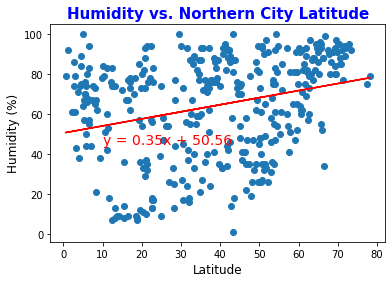

There is very little correlation of the humidity the further north the city is from the equator.


In [121]:
# Northern Hemisphere - Humidity (%) vs. Latitude

x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 45), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.title('Humidity vs. Northern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is very little correlation of the humidity the further north the city is from the equator.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007523654109179764


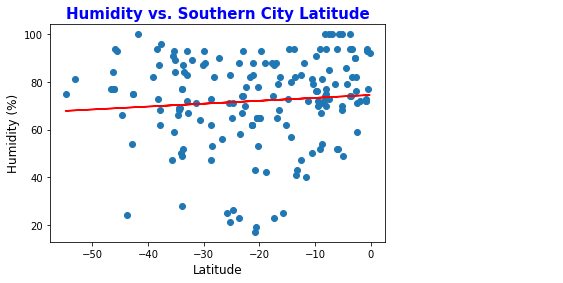

There is no correlation of the humidity the further south the city is from the equator.


In [123]:
# Southern Hemisphere - Humidity (%) vs. Latitude

x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 45), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.title('Humidity vs. Southern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is no correlation of the humidity the further south the city is from the equator.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.023682876724846855


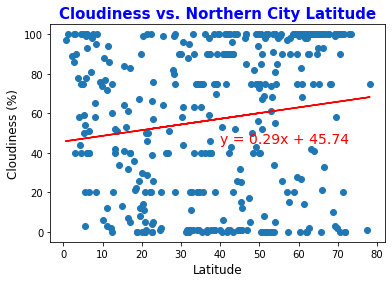

There is very little correlation of the cloudiness the further north the city is from the equator.


In [125]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 45), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('Cloudiness vs. Northern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is very little correlation of the cloudiness the further north the city is from the equator.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10867400667998096


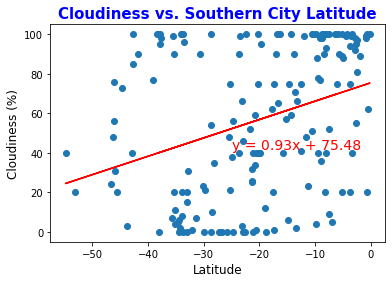

There is very little correlation of the cloudiness the further south the city is from the equator.


In [134]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25, 42), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('Cloudiness vs. Southern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is very little correlation of the cloudiness the further south the city is from the equator.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013278071141394765


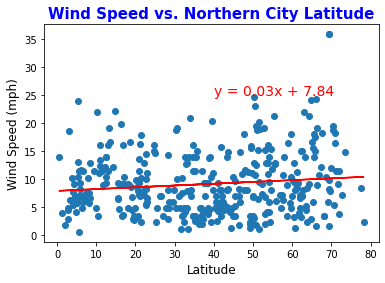

There is very little correlation of the wind speed the further north the city is from the equator.


In [139]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 25), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('Wind Speed vs. Northern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is very little correlation of the wind speed the further north the city is from the equator.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0498199830197767


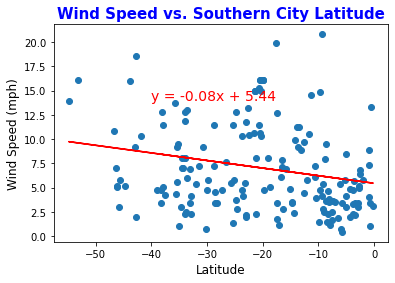

There is very little correlation of the wind speed the further south the city is from the equator.


In [141]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 14), fontsize=14, color="red")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('Wind Speed vs. Southern City Latitude', fontsize=15, fontweight= 'bold', color='b')

print(f'The r-squared is: {rvalue**2}')
plt.show()

print('There is very little correlation of the wind speed the further south the city is from the equator.')